# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [138]:
X_ = pd.read_csv("X_train_final.csv")
X_test = pd.read_csv("X_test_final.csv")

In [139]:
y_ = pd.read_fwf('y_train.txt', header=None)
y_test = pd.read_fwf('y_test.txt', header=None)

In [140]:
X_ = X_.drop('Unnamed: 0', axis=1)
X_.set_index('Individual', append=True, inplace=True)

X_test = X_test.drop('Unnamed: 0', axis=1)
X_test.set_index('Individual', append=True, inplace=True)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Teste. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [142]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=99)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [144]:
clf = DecisionTreeClassifier(max_depth=4, random_state=99)
clf.fit(X_train, y_train)

importances = clf.feature_importances_

feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

top_3_features = feature_importances.sort_values(by='importance', ascending=False).head(3)

In [145]:
top_3_features

,feature,importance
52,"('53 tGravityAcc-min()-X',)",0.289795
271,"('272 fBodyAcc-mad()-X',)",0.250716
41,"('42 tGravityAcc-mean()-Y',)",0.164459


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [2]:
selected_columns = ["('41 tGravityAcc-mean()-X',)", "('390 fBodyAccJerk-bandsEnergy()-1',)", "('560 angle(Y,gravityMean)',)"]

X_train_reduced = X_train[selected_columns]
X_valid_reduced = X_valid[selected_columns]
X_test_reduced = X_test[selected_columns]

NameError: name 'X_train' is not defined

In [ ]:
path = DecisionTreeClassifier(random_state=99).cost_complexity_pruning_path(X_train_reduced, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [151]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=99, ccp_alpha = ccp_alpha).fit(X_train_reduced, y_train)
    clfs.append(clf)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [153]:
train_scores = [clf.score(X_train_reduced, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid_reduced, y_valid) for clf in clfs]

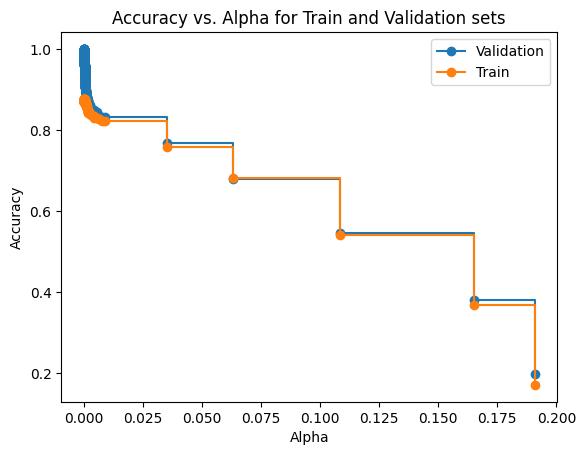

In [154]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs. Alpha for Train and Validation sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="Validation",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="Train",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [174]:
ind_best_tree = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
best_tree = clfs[ind_best_tree]

print(f'The accuracy of the best tree in the validation set: {valid_scores[ind_best_tree]*100:.2f}')

best_tree

The accuracy of the best tree in the validation set: 87.70


DecisionTreeClassifier(ccp_alpha=0.0005944900938784106, random_state=99)

Accuracy: 68.85


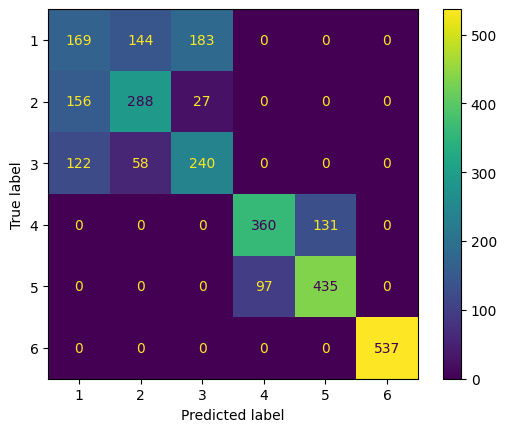

In [182]:
test_acc = best_tree.score(X_test_reduced, y_test)

# Print accuracy
print(f'Accuracy: {test_acc * 100:.2f}')

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(best_tree, X_test_reduced, y_test)
plt.show()